# 3-2 비트코인 시세 예측하기(시계열 데이터)

## 탐색: 시간 정보가 포함된 데이터 살펴보기

[market price 데이터셋의 기본 정보 구하기]

In [3]:
# -*- coding: UTF-8 -*-
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.rcParams['axes.unicode_minus'] = False

file_path = "/Users/yanghaejun/Documents/이것이 데이터분석이다/이것이 데이터 분석이다 예제/data/market-price.csv"
bitcoin_df = pd.read_csv(file_path, names = ["day", "price"])

# 기본 정보를 출력
print(bitcoin_df.shape)
print(bitcoin_df.info())
print(bitcoin_df.tail())

(365, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   day     365 non-null    object 
 1   price   365 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB
None
                day        price
360  2018.8.22 0:00  6575.229167
361  2018.8.23 0:00  6434.881667
362  2018.8.24 0:00  6543.645714
363  2018.8.25 0:00  6719.429231
364  2018.8.26 0:00  6673.274167


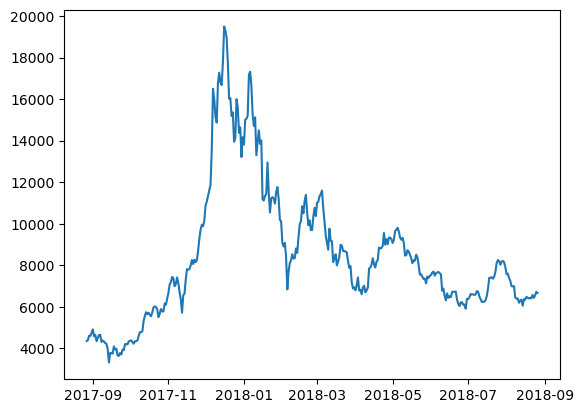

In [67]:
# to_datatime으로 day 피처를 시계열 피처로 변환
bitcoin_df["day"] = pd.to_datetime(bitcoin_df["day"])

# day 데이터 프레임의 index로 설정
bitcoin_df.set_index("day", inplace = True)

# 일자별 비트코인 시세를 시각화
bar_list1 = plt.plot(bitcoin_df)
plt.show()

## 예측: 파이썬 라이브러리를 활용해 시세 예측하기

[ARIMA 모델 활용하기: 모델 학습]

In [68]:
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm

# (AR = 2, 차분 = 1, MA = 2) 파라미터로 ARIMA 모델을 학습
model = ARIMA(bitcoin_df.price.values, order = (2, 1, 2))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  365
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -2787.490
Date:                Mon, 02 Jan 2023   AIC                           5584.980
Time:                        13:42:51   BIC                           5604.466
Sample:                             0   HQIC                          5592.725
                                - 365                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2418      0.305      0.793      0.428      -0.356       0.839
ar.L2          0.6071      0.200      3.036      0.002       0.215       0.999
ma.L1         -0.1513      0.306     -0.494      0.6

/Users/yanghaejun/opt/anaconda3/envs/yang_conda/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/yanghaejun/opt/anaconda3/envs/yang_conda/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


[ARIMA 모델 활용하기: 모델의 성능 & 예측 결과 시각화]

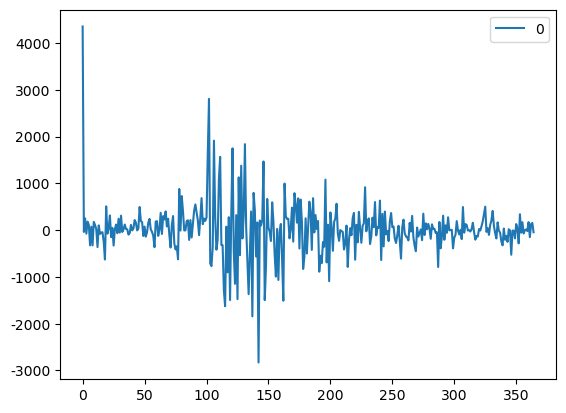

In [4]:
fig = model_fit.predict()
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()

[Fackbook Prophet 활용하기]

In [7]:
from prophet import Prophet

# prophet을 사용하기 위해서는 다음과 같이 피처명을 변경해야 합니다: "ds", "y"
file_path = "/Users/yanghaejun/Documents/이것이 데이터분석이다/이것이 데이터 분석이다 예제/data/market-price.csv"
bitcoin_df = pd.read_csv(file_path, names = ["ds", "y"])
bitcoin_df

,ds,y
0,2017.8.27 0:00,4354.308333
1,2017.8.28 0:00,4391.673517
2,2017.8.29 0:00,4607.985450
3,2017.8.30 0:00,4594.987850
4,2017.8.31 0:00,4748.255000
...,...,...
360,2018.8.22 0:00,6575.229167
361,2018.8.23 0:00,6434.881667
362,2018.8.24 0:00,6543.645714
363,2018.8.25 0:00,6719.429231


In [11]:
prophet = Prophet(seasonality_mode = "multiplicative",
                yearly_seasonality = True,
                weekly_seasonality = True,
                daily_seasonality = True,
                changepoint_prior_scale = 0.5)
prophet.fit(bitcoin_df)

14:46:39 - cmdstanpy - INFO - Chain [1] start processing
14:46:39 - cmdstanpy - INFO - Chain [1] done processing


In [12]:
# 5일을 내다보며 예측합니다.
future_data = prophet.make_future_dataframe(periods = 5, freq = "D")
forecast_data = prophet.predict(future_data)
forecast_data[["ds", "yhat", "yhat_lower", "yhat_upper"]]

,ds,yhat,yhat_lower,yhat_upper
0,2017-08-27,4439.768838,3797.606908,5109.594793
1,2017-08-28,4507.077764,3857.941414,5172.190947
2,2017-08-29,4563.873803,3892.828500,5212.499952
3,2017-08-30,4568.128168,3863.811772,5256.633573
4,2017-08-31,4608.264852,3978.924183,5280.957002
...,...,...,...,...
365,2018-08-27,6896.612127,6235.628514,7538.911763
366,2018-08-28,6988.750542,6335.233128,7693.138462
367,2018-08-29,7002.907697,6305.506405,7702.364582
368,2018-08-30,7074.530326,6393.011442,7763.381003


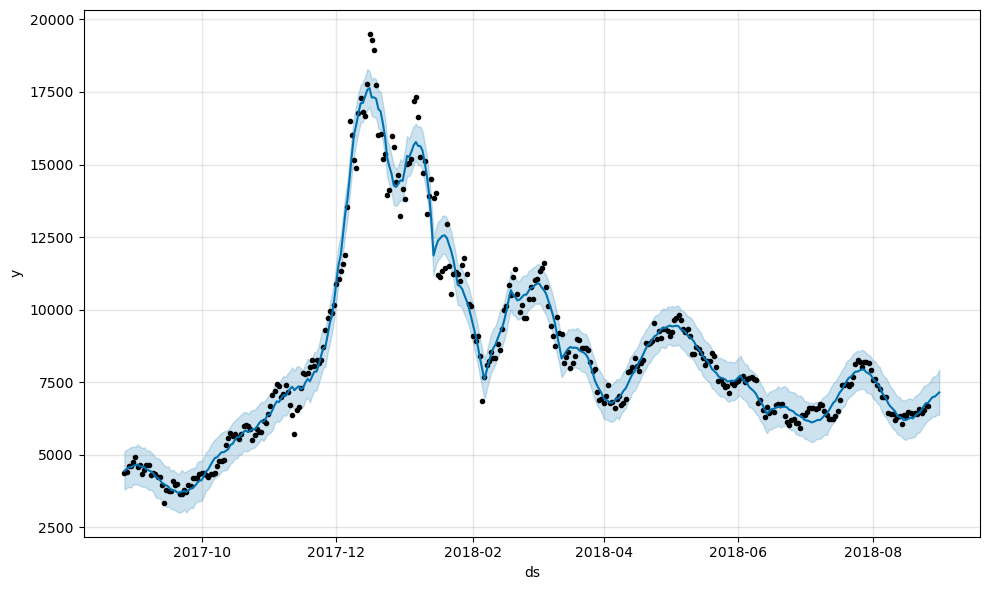

In [13]:
fig1 = prophet.plot(forecast_data)

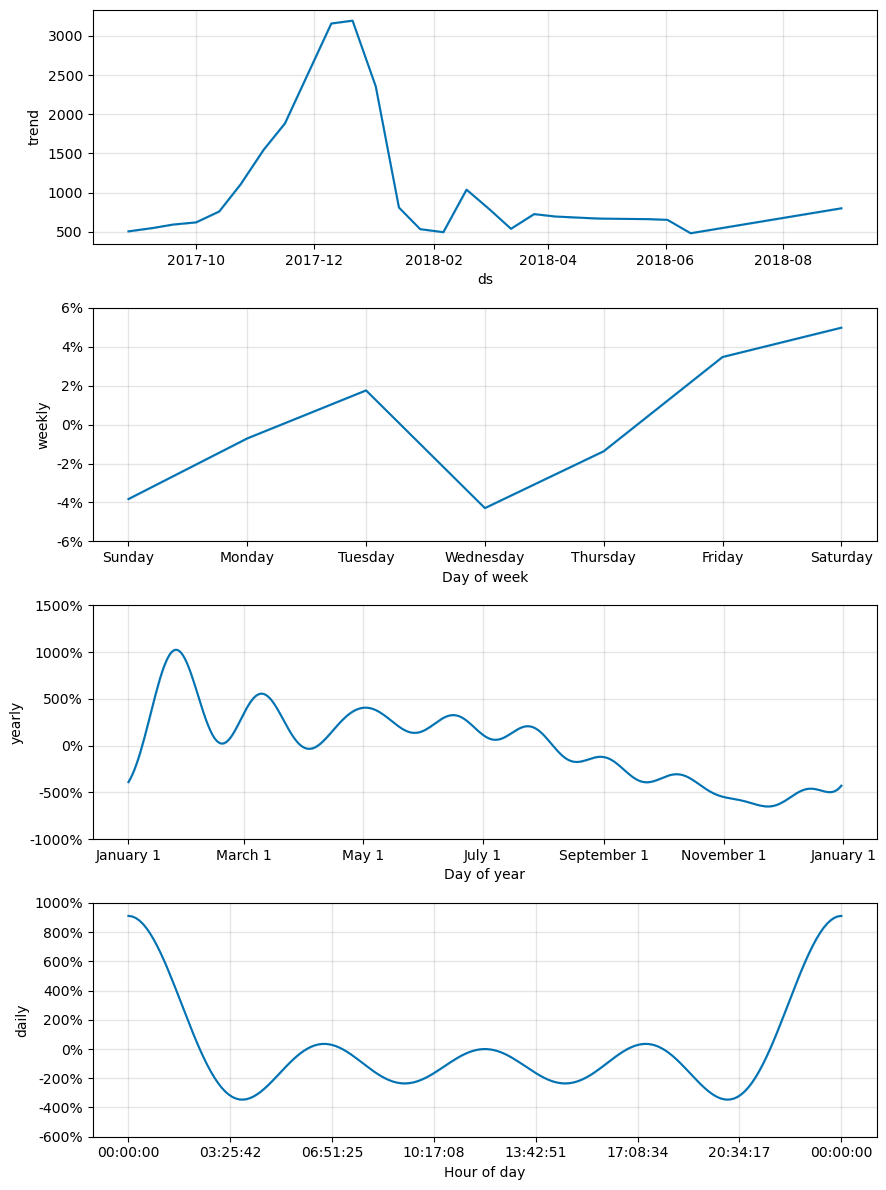

In [14]:
fig2 = prophet.plot_components(forecast_data)

[Fackbook Prophet 활용하기: 실제 데이터와의 비교]

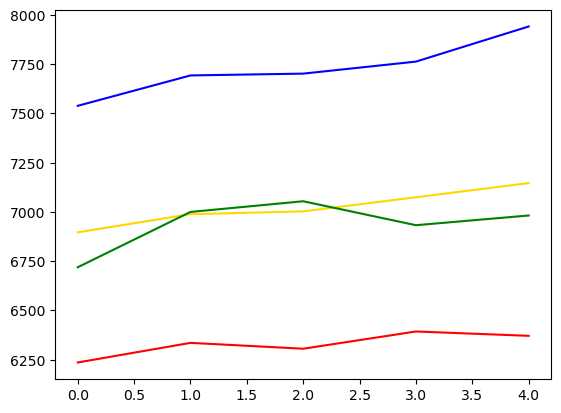

In [15]:
test_file_path = "/Users/yanghaejun/Documents/이것이 데이터분석이다/이것이 데이터 분석이다 예제/data/market-price-test.csv"
bitcoin_test_df = pd.read_csv(test_file_path, names = ["ds", "y"])

# 마지막 5일 예측 데이터임. (2018-08-27 ~ 2018-08-31)
pred_y = forecast_data["yhat"].values[-5:]
# 실제 5일 가격 데이터임. (2018-08-27 ~ 2018-08-31)
test_y = bitcoin_test_df["y"].values[-5:]
# 마지막 5일 예측 데이터의 최소값임.
pred_y_lower = forecast_data["yhat_lower"].values[-5:]
# 마지막 5일 예측 데이터의 최대값임.
pred_y_upper = forecast_data["yhat_upper"].values[-5:]

# 시각화
plt.plot(pred_y, color = "gold")
plt.plot(pred_y_lower, color = "red")
plt.plot(pred_y_upper, color = "blue")
plt.plot(test_y, color = "green")

plt.show()

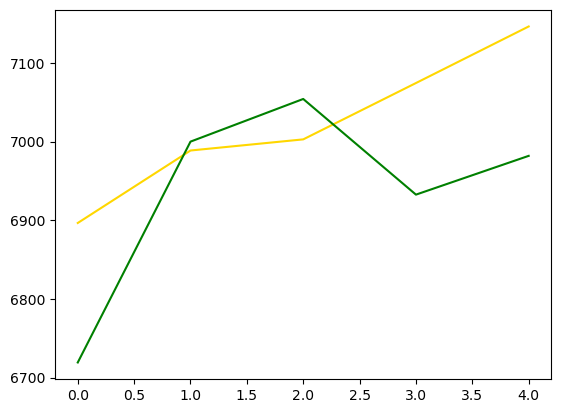

In [16]:
# 예측 모델과 실제 모델의 비교
plt.plot(pred_y, color = "gold")
plt.plot(test_y, color = "green")

plt.show()

In [17]:
from math import sqrt
from sklearn.metrics import mean_squared_error

rmse = sqrt(mean_squared_error(pred_y, test_y))
rmse
# ARIMA 모델보다 감소한 rmse 수치를 볼 수 있음.

127.5951894500513

## 활용: 더 나은 결과를 위한 방법

[상한가 및 하한가 설정하기]

14:46:43 - cmdstanpy - INFO - Chain [1] start processing
14:46:43 - cmdstanpy - INFO - Chain [1] done processing


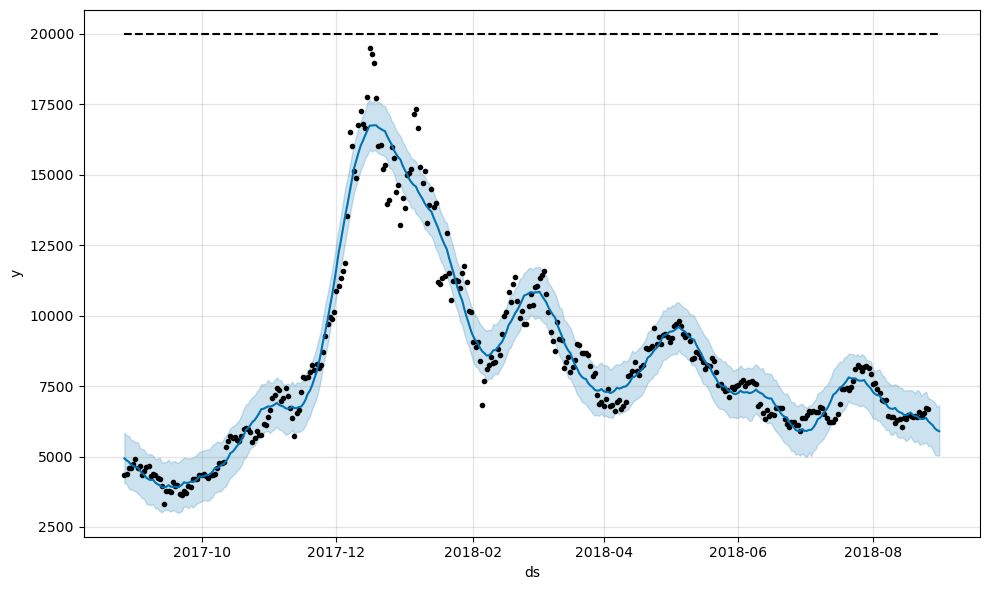

In [18]:
bitcoin_df = pd.read_csv("/Users/yanghaejun/Documents/이것이 데이터분석이다/이것이 데이터 분석이다 예제/data/market-price.csv", names = ["ds", "y"])

# 상한가를 설정
bitcoin_df["cap"] = 20000

# 상한가 적용을 위한 파라미터를 다음과 같이 설정
prophet = Prophet(seasonality_mode = "multiplicative",
                growth = "logistic",
                yearly_seasonality = True,
                weekly_seasonality = True,
                daily_seasonality = True,
                changepoint_prior_scale = 0.5)
prophet.fit(bitcoin_df)

# 5일을 내다보며 예측
future_data = prophet.make_future_dataframe(periods = 5, freq = "D")

# 상한가를 설정
future_data["cap"] = 20000
forecast_data = prophet.predict(future_data)

fig = prophet.plot(forecast_data)

[예측과 실제 비교 그래프]

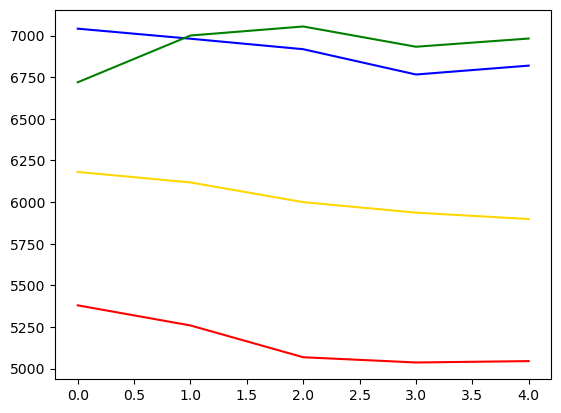

In [19]:
test_file_path = "/Users/yanghaejun/Documents/이것이 데이터분석이다/이것이 데이터 분석이다 예제/data/market-price-test.csv"
bitcoin_test_df = pd.read_csv(test_file_path, names = ["ds", "y"])

pred_y = forecast_data.yhat.values[-5:]
pred_y_lower = forecast_data.yhat_lower.values[-5:]
pred_y_upper = forecast_data.yhat_upper.values[-5:]
test_y = bitcoin_test_df.y.values[-5:]

plt.plot(pred_y, color = "gold")
plt.plot(pred_y_lower, color = "red")
plt.plot(pred_y_upper, color = "blue")
plt.plot(test_y, color = "green")

plt.show()
# 상한가를 설정하는 것이 독이 됐다는 것을 알 수 있음. (모델이 예측한 상한가 가격보다 실제 가격이 더 높기 때문)
# 또한 '5일 동안 상승/하락할 것이다'라는 큰 범위의 트렌드를 예측하는 것조차 실패함. (노란색 줄의 기울기와 초록색 줄의 기울기가 다르기 때문)

[이상치 제거하기]

14:57:15 - cmdstanpy - INFO - Chain [1] start processing
14:57:16 - cmdstanpy - INFO - Chain [1] done processing


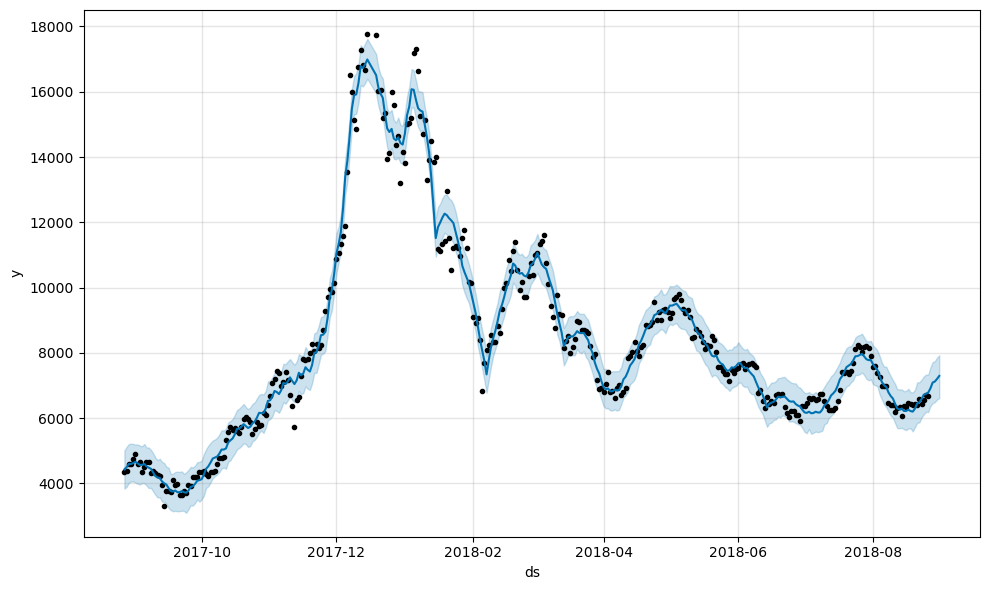

In [30]:
# 18,000 이상의 데이터는 이상치라고 판단
bitcoin_df = pd.read_csv("/Users/yanghaejun/Documents/이것이 데이터분석이다/이것이 데이터 분석이다 예제/data/market-price.csv", names = ["ds", "y"])
bitcoin_df.drop(index = bitcoin_df[bitcoin_df["y"] >= 18000].index, inplace = True)

# prophet 모델을 학습
prophet = Prophet(seasonality_mode = "multiplicative",
                yearly_seasonality = True,
                weekly_seasonality = True,
                daily_seasonality = True,
                changepoint_prior_scale = 0.5)

prophet.fit(bitcoin_df)

# 5일 단위의 미래를 예측
future_data = prophet.make_future_dataframe(periods = 5, freq = "D")
forecast_data = prophet.predict(future_data)

# 예측 결과를 그래프로 출력
fig = prophet.plot(forecast_data)

208.54920044872017

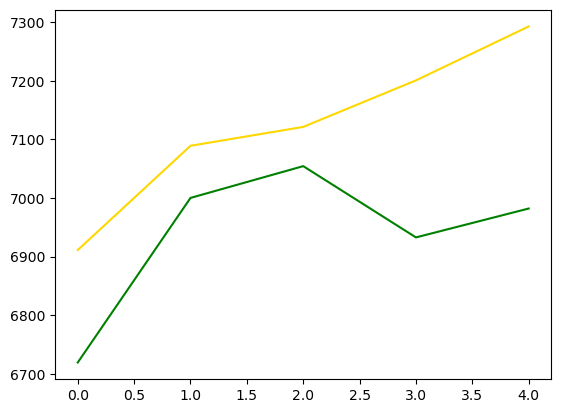

In [35]:
test_file_path = "/Users/yanghaejun/Documents/이것이 데이터분석이다/이것이 데이터 분석이다 예제/data/market-price-test.csv"
bitcoin_test_df = pd.read_csv(test_file_path, names = ["ds", "y"])

# 예측 및 실제 마지막 5일의 데이터
pred_y = forecast_data["yhat"].values[-5:]
test_y = bitcoin_test_df["y"].values[-5:]

plt.plot(pred_y, color = "gold")
plt.plot(test_y, color = "green")

# rmse Score
rmse = sqrt(mean_squared_error(pred_y, test_y))
rmse